# Breast Cancer Detection 

### Breast cancer is the most commonly occurring cancer in women and the second most common cancer overall. There were over 2.3 million new cases in 2020, making it a significant health problem in the present day.

In [1]:
pip install keras
!pip install tensorflow


## Loading important Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler

from keras.models import Sequential
from keras.layers import Dense

import warnings 
warnings.filterwarnings('ignore')

## Loading the Dataset from sklearn datasets

In [3]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [4]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
print(data['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [35]:
data['filename']

'C:\\Users\\Nehal Gupta\\anaconda3\\anaconda3\\lib\\site-packages\\sklearn\\datasets\\data\\breast_cancer.csv'

## dataset has 569 entries with 30 different properties

In [6]:
print(data['data'])
print('---------------------------------------------------------------')
print("Shape",data['data'].shape)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
---------------------------------------------------------------
Shape (569, 30)


In [7]:
print(data['feature_names'])
print('---------------------------------------------------------------')
print("Shape",data['feature_names'].shape)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
---------------------------------------------------------------
Shape (30,)


In [8]:
j = 0
for i in data['feature_names']:
    print(i, " : ", data['data'][0][j])
    j = j+1

mean radius  :  17.99
mean texture  :  10.38
mean perimeter  :  122.8
mean area  :  1001.0
mean smoothness  :  0.1184
mean compactness  :  0.2776
mean concavity  :  0.3001
mean concave points  :  0.1471
mean symmetry  :  0.2419
mean fractal dimension  :  0.07871
radius error  :  1.095
texture error  :  0.9053
perimeter error  :  8.589
area error  :  153.4
smoothness error  :  0.006399
compactness error  :  0.04904
concavity error  :  0.05373
concave points error  :  0.01587
symmetry error  :  0.03003
fractal dimension error  :  0.006193
worst radius  :  25.38
worst texture  :  17.33
worst perimeter  :  184.6
worst area  :  2019.0
worst smoothness  :  0.1622
worst compactness  :  0.6656
worst concavity  :  0.7119
worst concave points  :  0.2654
worst symmetry  :  0.4601
worst fractal dimension  :  0.1189


In [9]:
data['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [10]:
data['target'].shape

(569,)

In [11]:
data['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [12]:
data['target_names'].shape

(2,)

## Heatmap showing Correlation among different attributes

<AxesSubplot:>

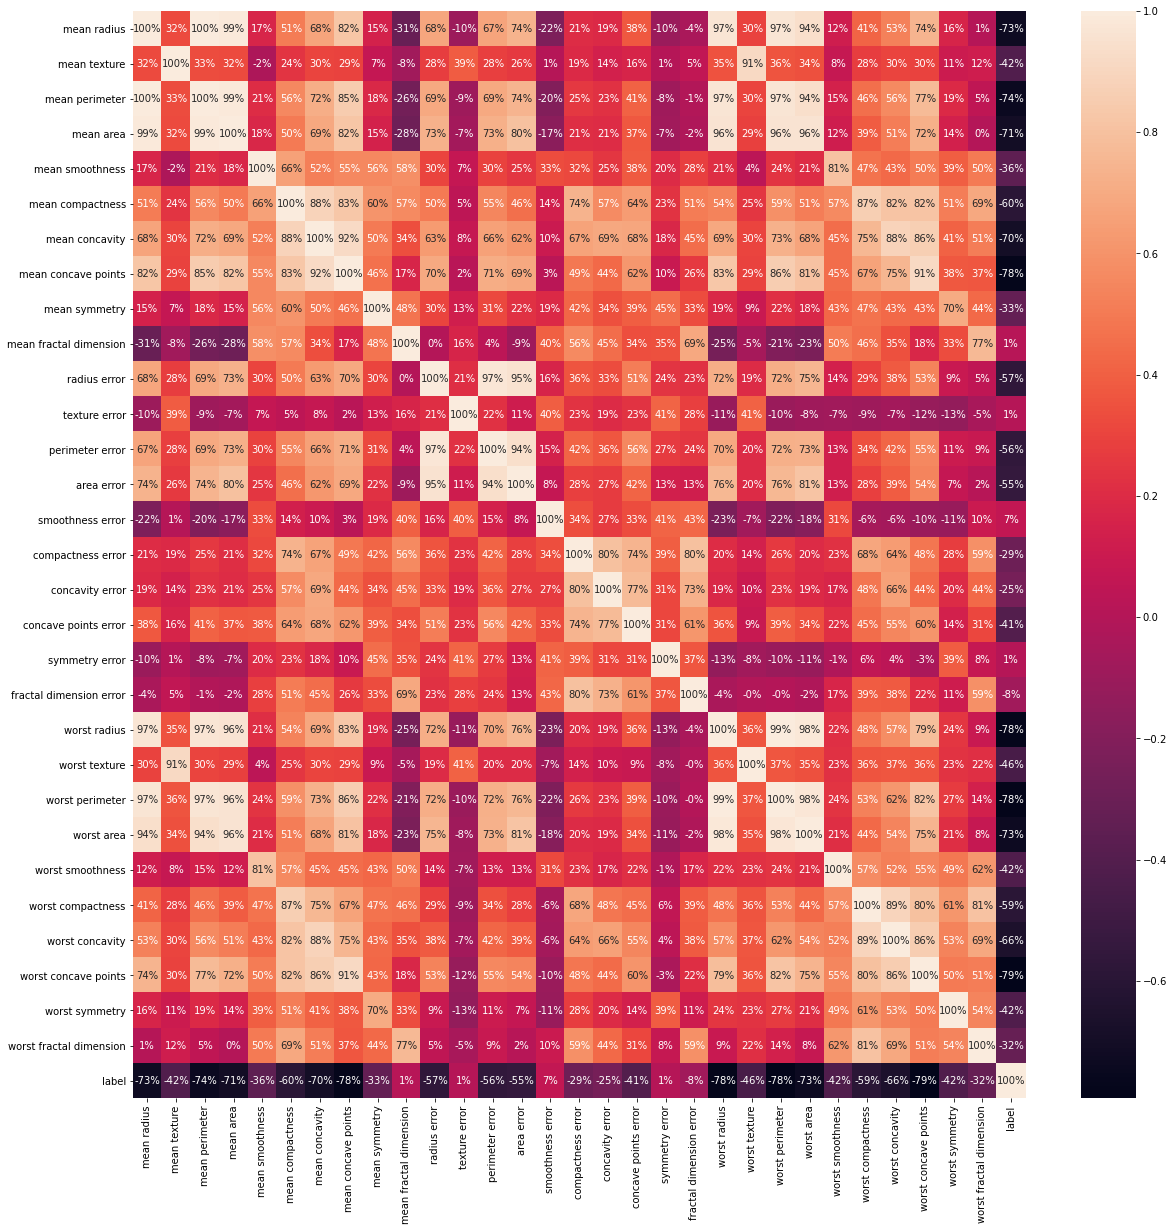

In [36]:
plt.figure(figsize=(20,20))  
sns.heatmap(df.corr(), annot=True, fmt='.0%')

## Assigning data of the dataset to feature

In [13]:
feature = data['data']
feature.shape

(569, 30)

## Assigning target of the dataset to label 

In [14]:
label = data['target']
label.shape

(569,)

## Standard Scaler function for scaling

In [15]:
scale = StandardScaler()
feature = scale.fit_transform(feature)
feature

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [16]:
j = 0
for i in data['feature_names']:
    print(i, " : ", feature[0][j])
    j = j+1

mean radius  :  1.0970639814699807
mean texture  :  -2.0733350146975935
mean perimeter  :  1.2699336881399383
mean area  :  0.9843749048031144
mean smoothness  :  1.568466329243428
mean compactness  :  3.2835146709868264
mean concavity  :  2.652873983743168
mean concave points  :  2.532475216403245
mean symmetry  :  2.2175150059646405
mean fractal dimension  :  2.255746885296269
radius error  :  2.4897339267376193
texture error  :  -0.5652650590684639
perimeter error  :  2.833030865855184
area error  :  2.4875775569611043
smoothness error  :  -0.21400164666895383
compactness error  :  1.3168615683959484
concavity error  :  0.72402615808036
concave points error  :  0.6608199414286064
symmetry error  :  1.1487566671861758
fractal dimension error  :  0.9070830809973359
worst radius  :  1.8866896251792757
worst texture  :  -1.3592934737640827
worst perimeter  :  2.3036006236225606
worst area  :  2.0012374893299207
worst smoothness  :  1.3076862710715387
worst compactness  :  2.616665023512

In [17]:
print(feature[0])
print("------------------------------------------------------------------------")
print(data['target_names'][label[0]]," : ",label[0])

[ 1.09706398 -2.07333501  1.26993369  0.9843749   1.56846633  3.28351467
  2.65287398  2.53247522  2.21751501  2.25574689  2.48973393 -0.56526506
  2.83303087  2.48757756 -0.21400165  1.31686157  0.72402616  0.66081994
  1.14875667  0.90708308  1.88668963 -1.35929347  2.30360062  2.00123749
  1.30768627  2.61666502  2.10952635  2.29607613  2.75062224  1.93701461]
------------------------------------------------------------------------
malignant  :  0


In [18]:
df = pd.DataFrame(feature, columns = data['feature_names'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


## No null values are present

In [19]:
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [21]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-3.162867e-15,-6.530609e-15,-7.078891e-16,-8.799835e-16,6.132177e-15,-1.120369e-15,-4.421380e-16,9.732500e-16,-1.971670e-15,-1.453631e-15,...,-2.333224e-15,1.763674e-15,-1.198026e-15,5.049661e-16,-5.213170e-15,-2.174788e-15,6.856456e-16,-1.412656e-16,-2.289567e-15,2.575171e-15
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,...,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,-1.819865e+00,...,-1.726901e+00,-2.223994e+00,-1.693361e+00,-1.222423e+00,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00
25%,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,-7.226392e-01,...,-6.749213e-01,-7.486293e-01,-6.895783e-01,-6.421359e-01,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01
50%,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,-1.782793e-01,...,-2.690395e-01,-4.351564e-02,-2.859802e-01,-3.411812e-01,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01
75%,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,4.709834e-01,...,5.220158e-01,6.583411e-01,5.402790e-01,3.575891e-01,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01
max,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,4.910919e+00,...,4.094189e+00,3.885905e+00,4.287337e+00,5.930172e+00,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00


In [22]:
df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


## shape of feature and label

In [23]:
print(feature.shape)
print(label.shape)

(569, 30)
(569,)


## concatenating feature dataFrame with label

In [24]:
df_frt = pd.DataFrame(feature , columns = data['feature_names'])
df_lbl = pd.DataFrame(label , columns = ['label'])
df = pd.concat([df_frt, df_lbl], axis=1)
df = df.sample(frac = 1)

feature = df.values[ : , : 30]
label = df.values[ : ,30: ]

## Countplot for the label (0 or 1/  Malignaent or Benign)

<AxesSubplot:xlabel='label', ylabel='count'>

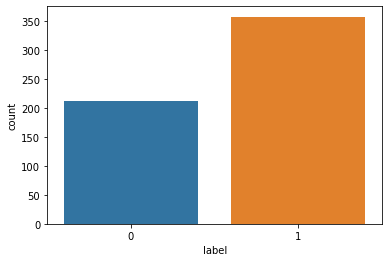

In [25]:
sns.countplot(df['label'], label = "Count")

## Splitting data into approx 80% as train data remaining 10 -10% for validation data and test data

In [26]:
#500 Training
X_train = feature[:500]
y_train = label[:500]

#35 Validation
X_val = feature[500:535]
y_val = label[500:535]

#34 Testing
X_test = feature[535:]
y_test = label[535:]

## Deep Learning model

###  1 Input Layer with 30 entries
###   3 Hidden Layer 
###   1 Output Layer

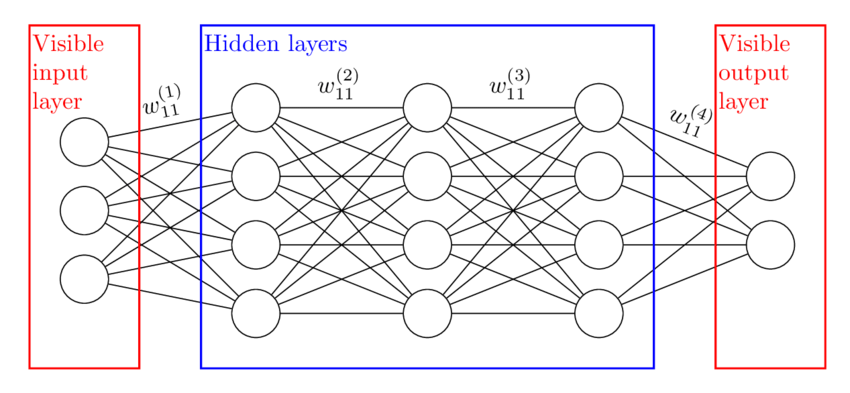

In [27]:
!pip install OpenCV-python
import cv2
from PIL import Image

image = cv2.imread("NeuralNetwork.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
display(Image.fromarray(image))

In [28]:
model = Sequential()

model.add(Dense(32, activation = 'relu', input_dim = 30))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))

model.add(Dense(1, activation = 'sigmoid'))

model.compile( loss = 'binary_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'])

### Fitting the data to model

In [29]:
model.fit( X_train , y_train, epochs = 20, batch_size = 5, validation_data = (X_val, y_val))

Epoch 1/20
100/100 [==============================] - 1s 5ms/step - loss: 0.3009 - accuracy: 0.8740 - val_loss: 0.0554 - val_accuracy: 1.0000
Epoch 2/20
100/100 [==============================] - 0s 2ms/step - loss: 0.1124 - accuracy: 0.9600 - val_loss: 0.0630 - val_accuracy: 0.9429
Epoch 3/20
100/100 [==============================] - 0s 2ms/step - loss: 0.0803 - accuracy: 0.9760 - val_loss: 0.0216 - val_accuracy: 1.0000
Epoch 4/20
100/100 [==============================] - 0s 2ms/step - loss: 0.0587 - accuracy: 0.9840 - val_loss: 0.0292 - val_accuracy: 1.0000
Epoch 5/20
100/100 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9800 - val_loss: 0.0189 - val_accuracy: 1.0000
Epoch 6/20
100/100 [==============================] - 0s 2ms/step - loss: 0.0473 - accuracy: 0.9860 - val_loss: 0.0411 - val_accuracy: 0.9714
Epoch 7/20
100/100 [==============================] - 0s 2ms/step - loss: 0.0417 - accuracy: 0.9820 - val_loss: 0.0437 - val_accuracy: 0.9714
Epoch 

### Loss and Accuracy for Test data

In [30]:
# 100 % Accuracy
model.evaluate(X_test , y_test)

2/2 [==============================] - 0s 3ms/step - loss: 0.0124 - accuracy: 1.0000


[0.012422528117895126, 1.0]

### Loss and Accuracy for Validation data

In [31]:
# 97 % Accuracy
model.evaluate(X_val , y_val)

2/2 [==============================] - 0s 4ms/step - loss: 0.0569 - accuracy: 0.9714


[0.05694422870874405, 0.9714285731315613]

## Predicted vs Actual value

In [32]:
for i in range(30):
  sample = X_test[i]
  sample = np.reshape(sample, (1,30))

  if (model.predict(sample)[0][0] > 0.5):
    print("-Benign")
  else:
    print("-Malignant")
  

  if (y_test[i] == 1):
    print("*Benign")
  else:
    print("*Malignant")
  print("-----------")
  

-Benign
*Benign
-----------
-Malignant
*Malignant
-----------
-Malignant
*Malignant
-----------
-Benign
*Benign
-----------
-Malignant
*Malignant
-----------
-Benign
*Benign
-----------
-Benign
*Benign
-----------
-Benign
*Benign
-----------
-Malignant
*Malignant
-----------
-Benign
*Benign
-----------
-Benign
*Benign
-----------
-Benign
*Benign
-----------
-Malignant
*Malignant
-----------
-Benign
*Benign
-----------
-Benign
*Benign
-----------
-Malignant
*Malignant
-----------
-Malignant
*Malignant
-----------
-Benign
*Benign
-----------
-Malignant
*Malignant
-----------
-Malignant
*Malignant
-----------
-Benign
*Benign
-----------
-Benign
*Benign
-----------
-Malignant
*Malignant
-----------
-Benign
*Benign
-----------
-Malignant
*Malignant
-----------
-Benign
*Benign
-----------
-Malignant
*Malignant
-----------
-Malignant
*Malignant
-----------
-Benign
*Benign
-----------
-Malignant
*Malignant
-----------


In [33]:
t = 0
for i in y_val:
  if (i == 1):
    t += 1

print(t)

22


In [34]:
t = 0
for i in y_test:
  if (i == 1):
    t += 1

print(t)

17
